### Objective of this Analysis:
To understand, how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity, Parental level of education, Lunch, Test preparation course).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d=pd.read_csv("StudentsPerformance.csv")

In [3]:
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
d.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


There are no null values

In [6]:
d.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
d.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight Analysis and Assumptions

Here the important variables are gender,race/ethnicity,parental level of education,lunch and test preparation course

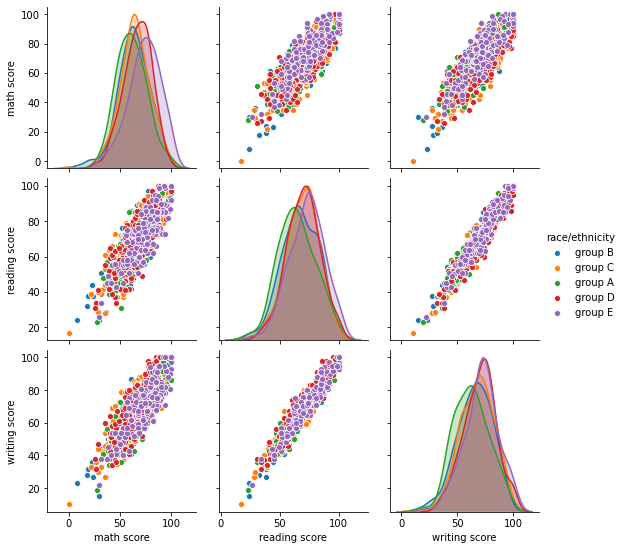

In [8]:
sns.pairplot(d,hue='race/ethnicity')
plt.show()

From the above plot,<br>
Group E outperforms the remaining groups

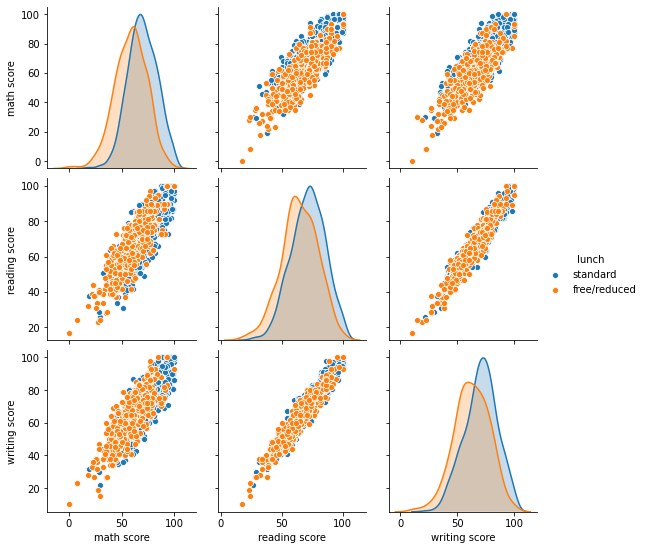

In [9]:
sns.pairplot(d,hue='lunch')
plt.show()

From the above plot,
<br>The students who have standard lunch secured better marks compared other students


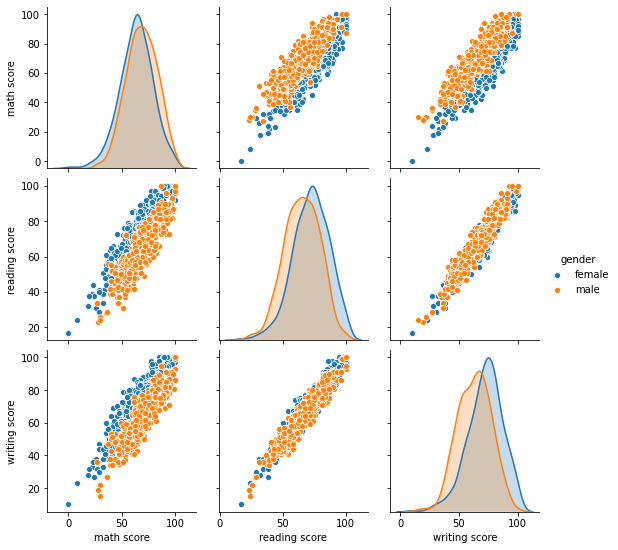

In [10]:
sns.pairplot(d,hue='gender')
plt.show()

From the above plot,
<br>Female students secured higher marks compared to male students

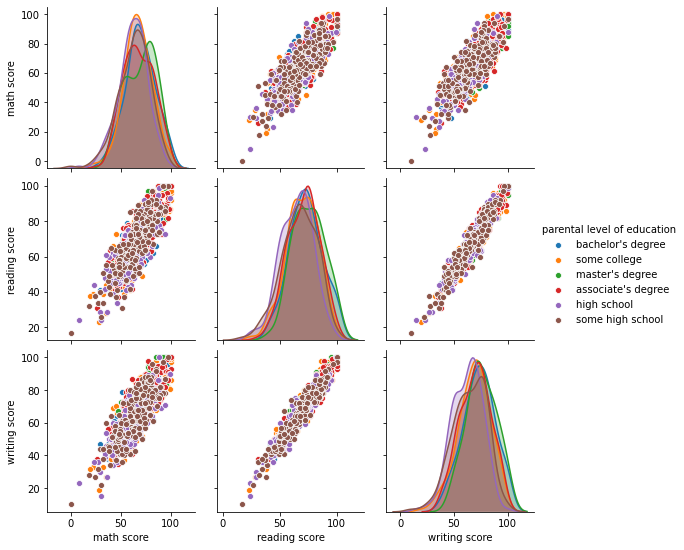

In [11]:
sns.pairplot(d,hue='parental level of education')
plt.show()

From the above plot,
<br>Maximum marks is secured by students whose parents educatiom is some college

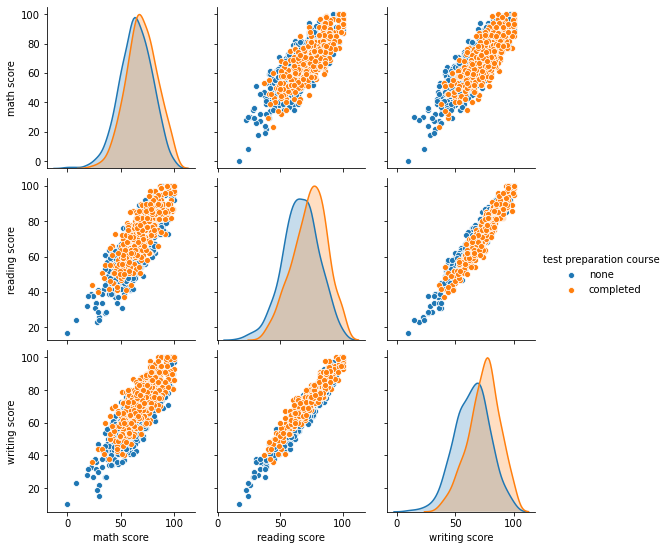

In [12]:
sns.pairplot(d,hue='test preparation course')
plt.show()

from the above plot,
<br>Students who completed test preparation course achieved better results than to other students

# Exploratory Data Analysis

<AxesSubplot:>

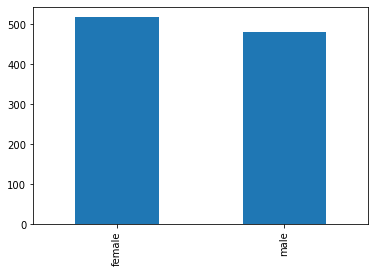

In [13]:
d.gender.value_counts().plot(kind='bar')

<AxesSubplot:>

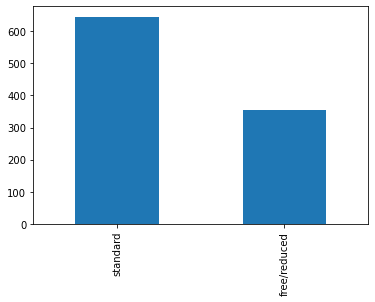

In [14]:
d.lunch.value_counts().plot(kind='bar')

<AxesSubplot:>

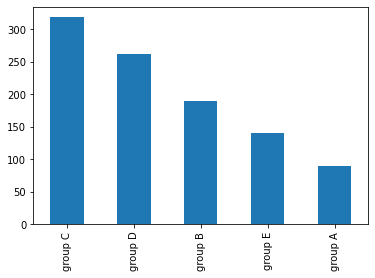

In [15]:
d['race/ethnicity'].value_counts().plot(kind='bar')

<AxesSubplot:>

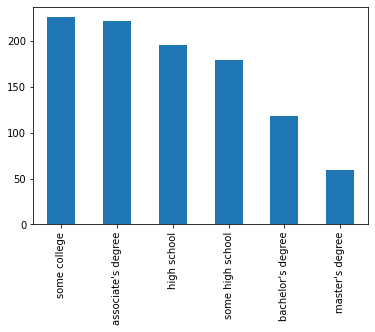

In [16]:
d['parental level of education'].value_counts().plot(kind='bar')

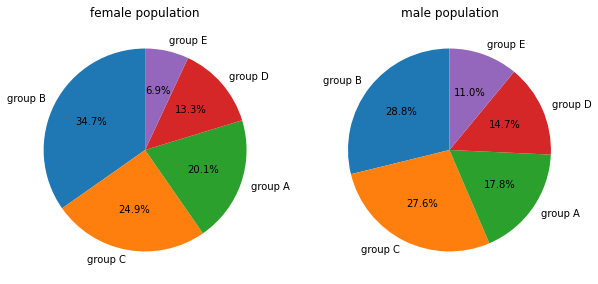

In [17]:
#compaing raves in male and female population
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
labels=list(d['race/ethnicity'].unique())
sizes=list(d[d['gender']=='female']['race/ethnicity'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax1.set_title("female population")

labels=list(d['race/ethnicity'].unique())
sizes=list(d[d['gender']=='male']['race/ethnicity'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax2.set_title("male population")
plt.show()

## Grading the marks

So lets divide the marks into 2 categories:Pass and Fail and understand the insights
<ol>
    <li>Pass >45</li>
    <li>Fail <=45
    <li>The overall grade is Pass if the candidate passes in 3 subjects otherwise Fail</li>
 </ol>

In [18]:
def grade(x):
    if x>45:
        return 'P'
    else:
        return 'F'
    
def overall_grade(x):
    if x['math grade']=='P' and x['writing grade']=='P' and x['reading grade']=='P':
        return 'P'
    else:
        return 'F'

In [19]:
d['math grade']=d['math score'].apply(grade)
d['reading grade']=d['reading score'].apply(grade)
d['writing grade']=d['writing score'].apply(grade)
d['overall grade']=d.apply(overall_grade,axis=1)

In [20]:
d

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade,overall grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,F,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,P
998,female,group D,some college,standard,completed,68,78,77,P,P,P,P


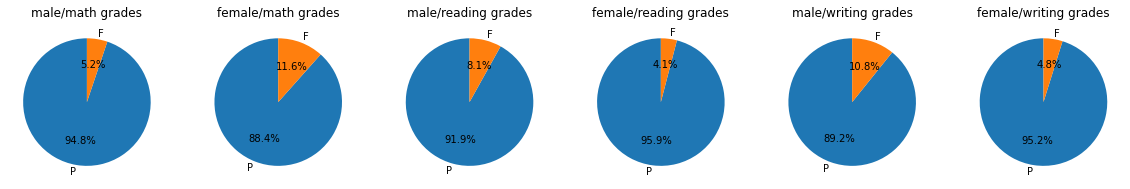

In [21]:
#math score
#male
fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(1,6,figsize=(20,20))
labels=list(d['math grade'].unique())
sizes=list(d[d['gender']=='male']['math grade'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax1.set_title("male/math grades")

#Female
labels=list(d['math grade'].unique())
sizes=list(d[d['gender']=='female']['math grade'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax2.set_title("female/math grades")

#reading scores
#male
labels=list(d['reading grade'].unique())
sizes=list(d[d['gender']=='male']['reading grade'].value_counts())
ax3.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax3.set_title("male/reading grades")

#Female
labels=list(d['reading grade'].unique())
sizes=list(d[d['gender']=='female']['reading grade'].value_counts())
ax4.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax4.set_title("female/reading grades")

#writing scores
#male
labels=list(d['writing grade'].unique())
sizes=list(d[d['gender']=='male']['writing grade'].value_counts())
ax5.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax5.set_title("male/writing grades")

#Female
labels=list(d['writing grade'].unique())
sizes=list(d[d['gender']=='female']['writing grade'].value_counts())
ax6.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
ax6.set_title("female/writing grades")
plt.show()


<p>From the above six graphes,the following understandings can be made<p>
<ol>
    <li>In math ,males outperformed females</li>
    <li>In reading,Females outperformed males</li>
    <li>In writing,Females outperformed males</li>
</ol>

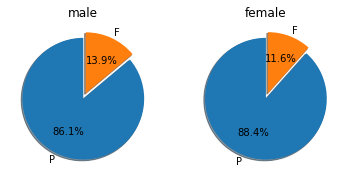

Overall grades


In [33]:
fig,(ax1,ax2)=plt.subplots(1,2)
labels=list(d['overall grade'].unique())
sizes=list(d[d['gender']=='male']['overall grade'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax1.set_title("male")

labels=list(d['overall grade'].unique())
sizes=list(d[d['gender']=='female']['overall grade'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax2.set_title("female")
plt.show()
print("Overall grades")

##### Females have a higher pass percentage than males

## Race/ethnicity

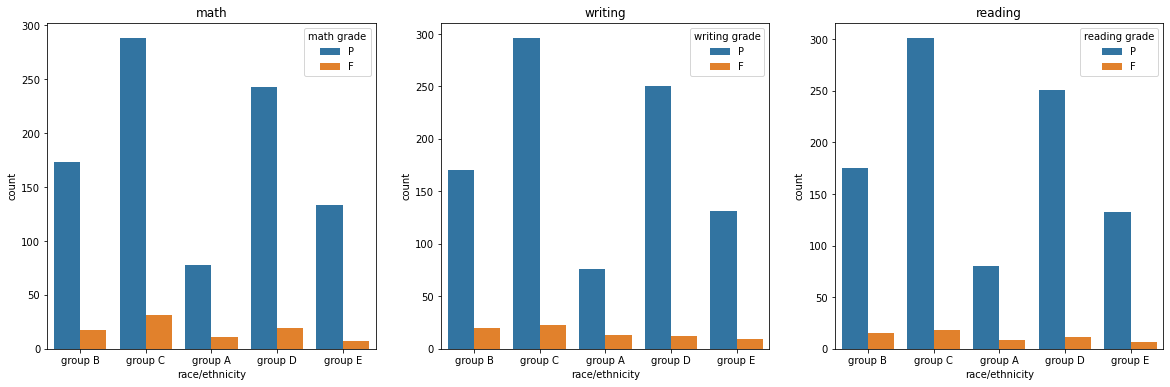

In [23]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.countplot(x="race/ethnicity", data=d, hue = 'math grade',ax=ax[0]).set_title("math")
sns.countplot(x="race/ethnicity", data=d, hue = 'writing grade',ax=ax[1]).set_title("writing")
sns.countplot(x="race/ethnicity", data=d, hue = 'reading grade',ax=ax[2]).set_title("reading")
plt.show()

The following observations can be made from above 3 graphs
<ol>
    <li>In math,writing and reading Group C outperformed than remaining groups
        <li>Next is Group D followed by Group B,group E and group A
</ol>

Text(0.5, 1.0, 'Overall')

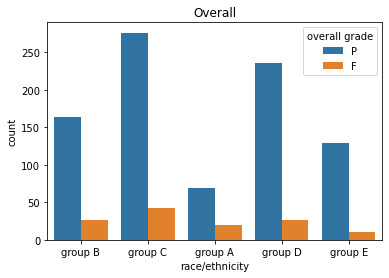

In [24]:
sns.countplot(x="race/ethnicity", data=d, hue = 'overall grade').set_title("Overall")

Group C has more pass students as well as fail students

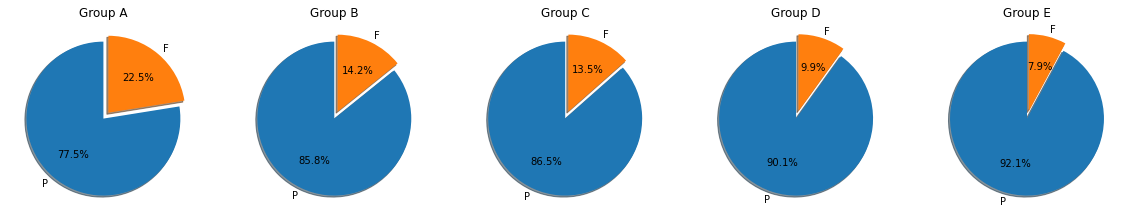

In [35]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,20))
labels=list(d['overall grade'].unique())
sizes=list(d[d['race/ethnicity']=='group A']['overall grade'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax1.set_title("Group A")

labels=list(d['overall grade'].unique())
sizes=list(d[d['race/ethnicity']=='group B']['overall grade'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax2.set_title("Group B")

labels=list(d['overall grade'].unique())
sizes=list(d[d['race/ethnicity']=='group C']['overall grade'].value_counts())
ax3.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax3.set_title("Group C")

labels=list(d['overall grade'].unique())
sizes=list(d[d['race/ethnicity']=='group D']['overall grade'].value_counts())
ax4.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax4.set_title("Group D")

labels=list(d['overall grade'].unique())
sizes=list(d[d['race/ethnicity']=='group E']['overall grade'].value_counts())
ax5.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax5.set_title("Group E")
plt.show()

Although number of pass students are high in Group C ,the group E has more pass percentage
<br>So,Group E outperformed the remaining groups

## Parental level of education

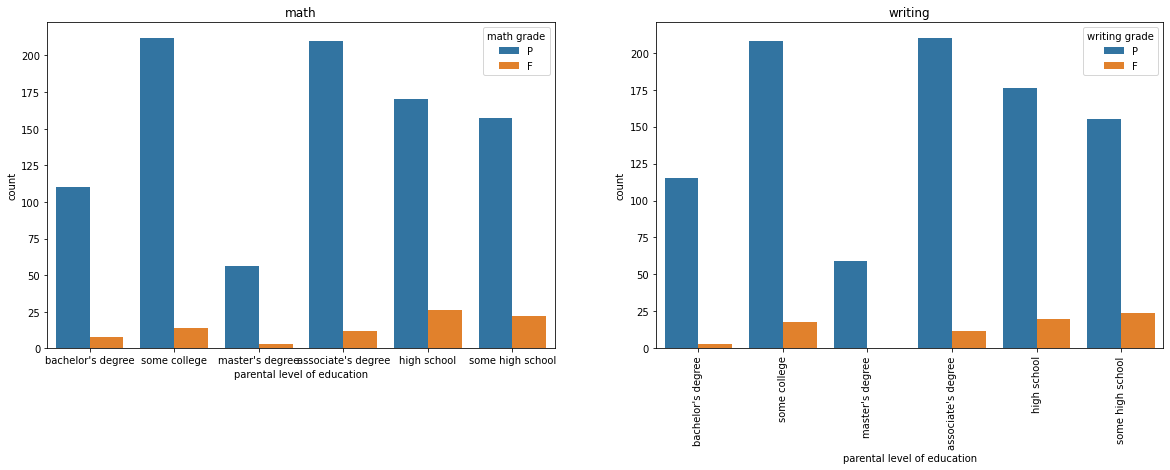

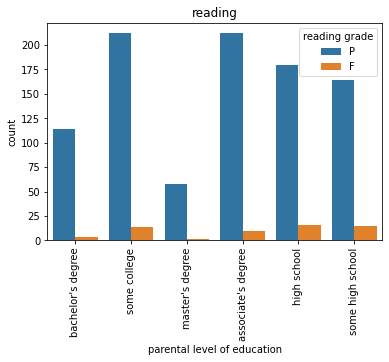

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x="parental level of education", data=d, hue = 'math grade',ax=ax[0]).set_title("math")
sns.countplot(x="parental level of education", data=d, hue = 'writing grade',ax=ax[1]).set_title("writing")
plt.show()
sns.countplot(x="parental level of education", data=d, hue = 'reading grade').set_title("reading")
plt.xticks(rotation=90)
plt.show()

The parental level of education is playing an crucial role in marks of students
<br>The children of master's degree have least failure rate

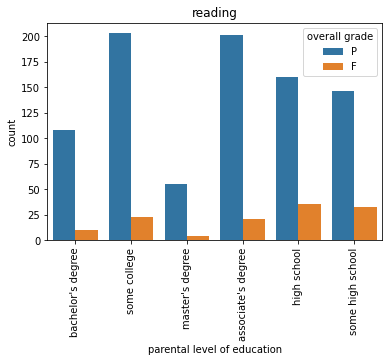

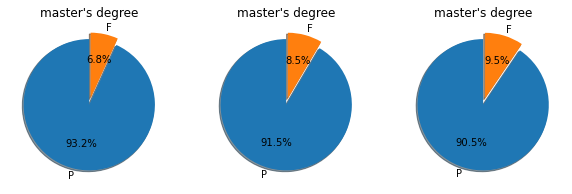

In [36]:
sns.countplot(x="parental level of education", data=d, hue ='overall grade').set_title("reading")
plt.xticks(rotation=90)
plt.show()
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,10))
labels=list(d['overall grade'].unique())
sizes=list(d[d['parental level of education']=='master\'s degree']['overall grade'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax1.set_title("master's degree")

labels=list(d['overall grade'].unique())
sizes=list(d[d['parental level of education']=='bachelor\'s degree']['overall grade'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax2.set_title("master's degree")

labels=list(d['overall grade'].unique())
sizes=list(d[d['parental level of education']=='associate\'s degree']['overall grade'].value_counts())
ax3.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax3.set_title("master's degree")
plt.show()

The following points are noted from the above plots
<ol>
    <li>THe higher the parental level of education,lower the chances of failure</li>
    <li>Master's degree has highest pass percentage</li>
</ol>

## Lunch

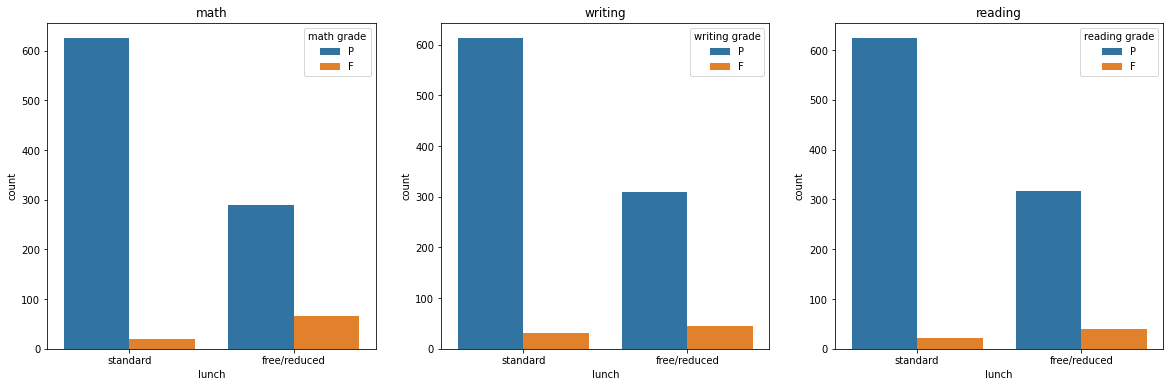

In [28]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.countplot(x="lunch", data=d, hue = 'math grade',ax=ax[0]).set_title("math")
sns.countplot(x="lunch", data=d, hue = 'writing grade',ax=ax[1]).set_title("writing")
sns.countplot(x="lunch", data=d, hue = 'reading grade',ax=ax[2]).set_title("reading")
plt.show()

In all 3 subjects,The students with standard lunch outperform the students with free/reduced lunch

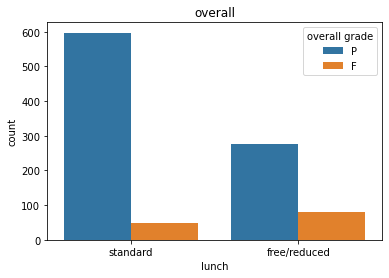

In [29]:
sns.countplot(x="lunch", data=d, hue = 'overall grade').set_title("overall")
plt.show()

<ol>
    <li>The pass percentage of students with standard lunch is more compared to the students with free/reduced lunch</li>
    <li>The fail percentage of students with standard lunch is less when compared with students having free/reduced lunch
</ol>

## Test preparation course

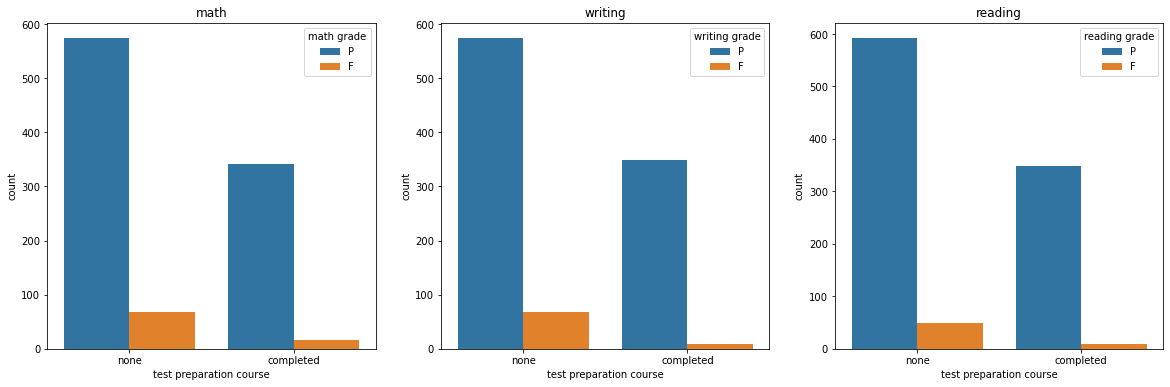

In [30]:
fig,ax=plt.subplots(1,3,figsize=(20,6))
sns.countplot(x="test preparation course", data=d, hue = 'math grade',ax=ax[0]).set_title("math")
sns.countplot(x="test preparation course", data=d, hue = 'writing grade',ax=ax[1]).set_title("writing")
sns.countplot(x="test preparation course", data=d, hue = 'reading grade',ax=ax[2]).set_title("reading")
plt.show()

The above plots dipicts that most students didn't take any test preparation course

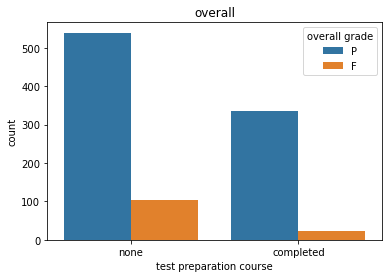

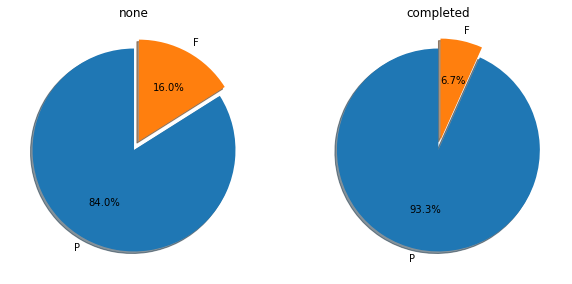

In [37]:
sns.countplot(x="test preparation course", data=d, hue = 'overall grade').set_title("overall")
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
labels=list(d['overall grade'].unique())
sizes=list(d[d['test preparation course']=='none']['overall grade'].value_counts())
ax1.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax1.set_title("none")

labels=list(d['overall grade'].unique())
sizes=list(d[d['test preparation course']=='completed']['overall grade'].value_counts())
ax2.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%',explode=[0,0.1],shadow=True)
ax2.set_title("completed")
plt.show()

<ol>
    <li>The piecharts depicts completing test preparation coarse reduces the chance of failure</li>
    <li>The pass percentage is more for the students who completed test preparation coarse
</ol>

## Conclusions:

<ol>
    <li>Females have more chance of getting passed and also getting more marks </li>
    <li>Although students whose parental level of education is higher have low failure rate.But the highest marks is cored by students whose parental level of education is low</li>
    <li>Group E students scored highest marks and also their failure rate is low</li>
    <li>Lunch is playing a significant role.The students who have standard lunch have got highest marks and also their failure rate is low</li>
    <li>The students who completed test preparation course have highest marks and also with low failure rate</li>
</ol>